# PRACTICA EVALUACIÓN FINAL - PARTE I #

Esta practica final tiene por objetivo evaluar los conocimientos que se han adquirido por parte del alumno a lo largo de los distintos temas del módulo. La práctica se divide en 2 partes: ésta primera parte que permite evaluar los temas de Data Understanding, Data Preparation, Regresión Lineal, Regresión Logística, Selección de variables, Análisis de componentes principales (PCA), Análisis Factorial y técnicas de clustering.

Supone por tanto un 75% de la calificación correspondiente a la Prática de Evaluación Final completa incluyendo ambas partes. Por tanto la parte 2, incluirá ejercicios de evaluación de los temas de series temporales y por ello supondrá un 25%.

En conjunto, toda la Práctica de Evaluación Final (ambas partes) tiene un peso del 60% de la nota final (el test de evaluación sería el 40% restante).

Es importante tener presente que, dado que se va a utilizar el mismo conjunto de datos para evaluar distintos temas del módulo, se perseguirán objetivos distintos en distintas partes de esta práctica parte I. Por ejemplo, para el modelo de regresión lineal, se tomará como variable objetivo ***Salary***, mientras que para la regresión logística, la variable objetivo será ***Gender***. Se deberá tener presente esto especialmente a la hora de llevar a cabo toda la fase de entendimiento y preparación de los datos ya que habrá transformaciones y analisis que serán comunes para ambos modelos y otras que serán específicas de cada modelo. en este sentido, el alumno deberá organizarse como mejor considere para llevar a cabo la práctica siguiendo el guión establecido pero con cierta flexibilidad para incluir todo aquello que considere oportuno en el momento que considere oportuno.

Por la misma razón, la parte de clustering no tiene variable objetivo como tal pero el analisis exploratorio y la preparación de los datos puede llevar a que haya particularidades para sus ejercicios además de las comunes.

Comenzando con esta primera parte de la práctica, en el primer bloque de código, conviene cargar las librerías que se van a utilizar a lo largo del notebook.

In [736]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import mean_squared_error, accuracy_score, silhouette_score
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency
from scipy import stats
import statsmodels.api as sm
from sklearn.model_selection import KFold

En el siguiente paso vamos a proceder a cargar el fichero Salary_MD.csv que servirá como conjunto de datos para llevar a cabo toda la evaluación de esta parte I. Se trata de un fichero en el que cada registro es un empleado y sobre él, cada campo aporta información laboral y de formación.

In [738]:
# Cargar el fichero de datos en un DataFrame

In [739]:
ruta = r"C:\Users\Usuario\Desktop\Salary_MD.csv" 
df = pd.read_csv(ruta)

En los siguientes bloques de código el alumno debe programar las sentencias de código que considere oportunas para hacerse una idea general de los datos y de las variables. Visualización de datos, gráficos, etc. Los bloques son orientativos, el alumno puede añadir cuantos considere y codificarlos según su criterio.

In [741]:
# Mostrar los 10 primeros registros

In [742]:
print(df.head(10))

   Age  Gender  Education Level              Job Title  Years of Experience  \
0   32    Male            1.000      Software Engineer                5.000   
1   28  Female            2.000           Data Analyst                3.000   
2   45    Male            3.000                Manager               15.000   
3   36  Female            1.000        Sales Associate                7.000   
4   52    Male            2.000               Director               20.000   
5   29    Male            1.000      Marketing Analyst                2.000   
6   42  Female            2.000        Product Manager               12.000   
7   31    Male            1.000          Sales Manager                4.000   
8   26  Female            1.000  Marketing Coordinator                1.000   
9   38    Male            3.000              Scientist               10.000   

   Salary    Country        Race  Senior  
0   90000         UK       White       0  
1   65000        USA         NaN       0  
2

In [743]:
# Describir el DataFrame

In [744]:
# Mostrar las columnas y tipos de datos

In [745]:
print(df.dtypes)

Age                      int64
Gender                  object
Education Level        float64
Job Title               object
Years of Experience    float64
Salary                   int64
Country                 object
Race                    object
Senior                   int64
dtype: object


### Pregunta 1 ###
De este primer vistazo general, ¿qué conclusiones sacamos acerca de las variables ***Salary*** y ***Years of Experience***? ¿Qué características tiene la variable ***Job Title***?

***Respuesta:***

A primera vista, podemos ver que conforme aumenta la variable Years of Experience también lo hace la variable Salary entonces podemos deducir que en principio, tienen una relación directa. La variable Job Title es una variable categórica que puede tener muchos valores distintos o incluso diferentes nombres para el mismo puesto de trabajo lo que se traduce como una alta cardinalidad. 

Pasamos ahora a profundizar aún más en las variables a través de las relaciones entre ellas. El alumno debe analizar correlaciones y las relaciones entre categóricas o categoricas y númericas.

In [750]:
# Calcular la matriz de correlación

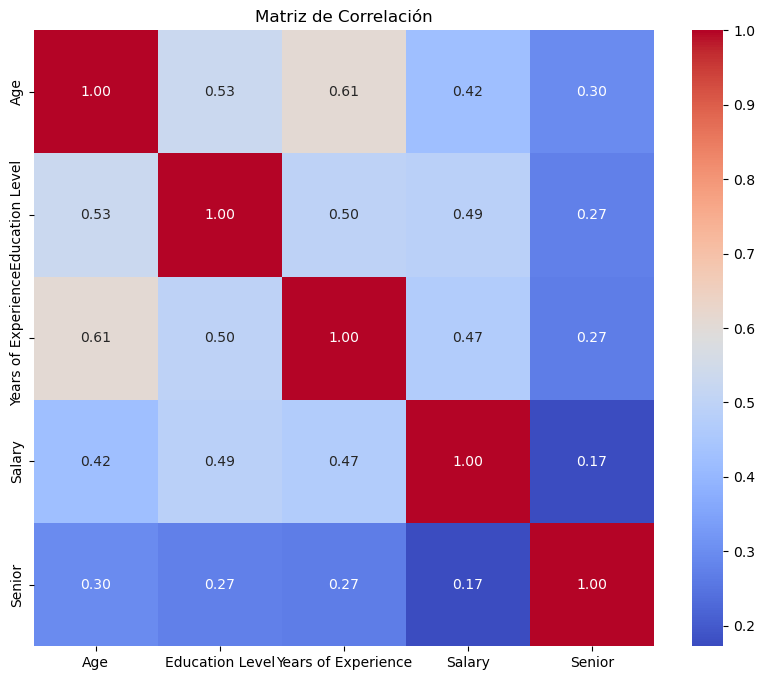

In [751]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()


In [752]:
# Calcular la matriz de coeficientes V de Cramér

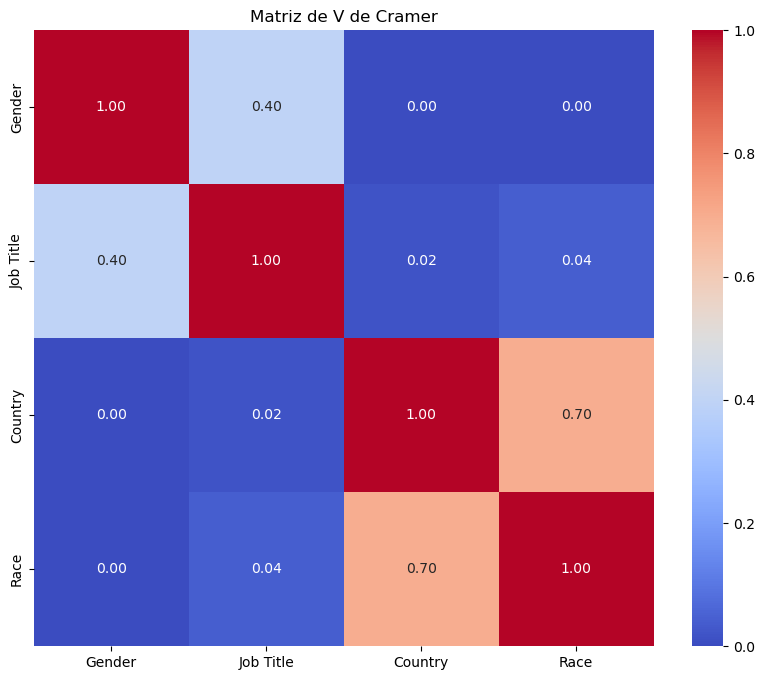

In [753]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
n = len(categorical_columns)
cramer_matrix = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        cramer_matrix[i, j] = cramers_v(df[categorical_columns[i]], df[categorical_columns[j]])
cramer_df = pd.DataFrame(cramer_matrix, index=categorical_columns, columns=categorical_columns)
plt.figure(figsize=(10, 8))
sns.heatmap(cramer_df, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de V de Cramer')
plt.show()

### Pregunta 2 ###
¿Cualés son las relaciones más destacadas entre variables? Describe estas relaciones e interpretalas brevemente.

***Respuesta:***

 Dentro de la matriz de correlación:
 1. Years of Experience-Age, tiene sentido que a mayor cantidad de años de experiencia, sea mayor la edad del empleado.
 2. Education Level-Age, conforme mayor sea la edad es más probable que el usuario tenga una mayor formación en su nivel de estudios.
 3. Years of Experience-Education Level, de la misma manera a mayor nivel de estudios tiene sentido que se tenga una mayor trayectoria laboral de manera estable y continuada.
 4. Salary-Education Level, conforme mayor nivel de estudios cabe dentro de la normalidad que el salario sea mayor.
 5. Salary-Years of Experience, de la misma manera que antes conforme más años de experiencia en el puesto se obtiene un mayor salario. 

 Dentro de la matriz de coeficientes de V de Cramer:
 1. Country-Race, los rasgos de la etnia y el país de cada persona suelen estar muy relacionado entre sí.
 2. Gender-Job Tlte, al parecer dentro del dataset existe cierta relación entre el puesto de trabajo y el género del empleado, esto puede ser debido que ciertos puestos de trabajo suelen tener mas afluencia de un genero u otro pero hay que investigarlo. 


Nos centramos ahora en la calidad del dato. Arrancamos con el analisis de valores nulos donde el alumno debe programar código para determinar las variables que tienen valores nulos, el número de registros de cada variable con valores nulos, etc.

In [758]:
# Tabla de porcentaje de registros con Missing Values por cada variable

In [759]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100  
missing_table = pd.DataFrame({
    'Nulos': missing_values,
    'Porcentaje (%)': missing_percentage
})
print(missing_table)

                     Nulos  Porcentaje (%)
Age                      0           0.000
Gender                  71           1.062
Education Level         23           0.344
Job Title               40           0.598
Years of Experience      0           0.000
Salary                   0           0.000
Country                 24           0.359
Race                   163           2.439
Senior                   0           0.000


In [760]:
# Cuenta de valores nulos por registro

In [761]:
df['Missing_Count'] = df.isnull().sum(axis=1)
print(df['Missing_Count'].value_counts())

Missing_Count
0    6461
1     161
2      32
3      24
4       6
Name: count, dtype: int64


### Pregunta 3 ###
¿Éxiste algún tipo de relación entre los valores nulos de la variable ***Gender*** y ***Salary***? Los nulos de ***Gender***, para esta práctica, hay que llevar a cabo algún tipo de imputación para no perder esos registros. ¿Cómo se realizará está imputación y cuales son las razones que llevan a hacerlo así?

***Respuesta:***

Existe cierta relación en aquellos registros con un Salary alto por encima del promedio es donde se registran los valores nulos dentro de la variable Gender. Considero que la imputación de estos nulos la podemos realizar según la moda ya que de este modo no eliminamos registros y mantenemos la coherencia además de ser un método rápido y sencillo de aplicar. 

Antes de pasar a ejecutar las acciones que hayamos decidido realizar para corregir los problemas de valores nulos, analizamos los valores atípicos de las variables. Utilizaremos 2 métodos para identificarlos: Z-Score y rango intercuartil (IQR)

In [766]:
# Identificación de outliers (z-score)

In [767]:
z_scores = np.abs(stats.zscore(df.select_dtypes(include=['number'])))
outliers_zscore = (z_scores > 3)
print(pd.DataFrame(outliers_zscore.sum(), columns=['Valores Atípicos (Z-Score)']))

                     Valores Atípicos (Z-Score)
Age                                         110
Education Level                               0
Years of Experience                          28
Salary                                        8
Senior                                        0
Missing_Count                               223


In [768]:
# Identificación de outliers (IQR)

In [769]:
df_num = df.select_dtypes(include=['number'])
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = (df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))
print(pd.DataFrame(outliers_iqr.sum(), columns=['Valores Atípicos (IQR)']))



                     Valores Atípicos (IQR)
Age                                     217
Education Level                           0
Years of Experience                      76
Salary                                    8
Senior                                  959
Missing_Count                           223


### Pregunta 4 ###
¿Qué variables tienen outliers? en ocasiones, dependiendo de los outliers de una variable, es más apropiado identificarlos mediante un método u otro. En tu opinión y en base al estudio de los outliers de cada variable numérica, ¿cuál es el más apropiado para cada una y por qué?

***Respuesta:***

Las variables que tienen ouliers son Age, Years of Experience, Salary y Senior.

Para Senior, Age y Years of Experience es mejor utilizar IQR porque poseen valores extremos e indica que no sigue una distribución normal. 
Para Salary es mejor utilizar z-score ya que los outliers son pocos y es más probable que sigan una distribución normal.

Ahora procedemos a trabajar los datos seleccionando registros, variables y solventando los problemas de outliers y valores nulos para dejar preparado el conjunto de datos para la fase de modelado posterior. En este sentido, las siguientes líneas de código, deben programarse para realizar estas transformaciones.

In [774]:

columns_to_drop = []  
df_cleaned = df.drop(columns=columns_to_drop)


In [775]:
# Imputación o acciones para tratar valores nulos
for col in df.select_dtypes(include=['object']).columns:
    df.loc[:, col] = df[col].fillna(df[col].mode()[0])  
for col in df.select_dtypes(include=['number']).columns:
    if df[col].skew() > 1: 
        df.loc[:, col] = df[col].fillna(df[col].median())  
    else:  
        df.loc[:, col] = df[col].fillna(df[col].mean())  

In [776]:
# Imputación o transformación de valores atípicos

In [777]:
# Método IQR para Senior, Age, Years of Experience
Q1 = df_cleaned[['Senior', 'Age', 'Years of Experience']].quantile(0.25)
Q3 = df_cleaned[['Senior', 'Age', 'Years of Experience']].quantile(0.75)
IQR = Q3 - Q1

# Definir límites
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Reemplazar outliers con los límites inferiores/superiores
for col in ['Senior', 'Age', 'Years of Experience']:
    df_cleaned[col] = np.where(df_cleaned[col] < lower_bound[col], lower_bound[col], df_cleaned[col])
    df_cleaned[col] = np.where(df_cleaned[col] > upper_bound[col], upper_bound[col], df_cleaned[col])

# Método Z-Score para Salary
z_scores = np.abs(stats.zscore(df_cleaned['Salary']))
df_cleaned = df_cleaned[(z_scores < 3)]


In [778]:

print(df_cleaned.isnull().sum())


print(df_cleaned.describe())


Age                      0
Gender                  71
Education Level         23
Job Title               40
Years of Experience      0
Salary                   0
Country                 24
Race                   163
Senior                   0
Missing_Count            0
dtype: int64
           Age  Education Level  Years of Experience     Salary   Senior  \
count 6676.000         6653.000             6676.000   6676.000 6676.000   
mean    33.299            1.624                8.026 115079.450    0.000   
std      7.789            0.880                5.939  53051.395    0.000   
min     13.000            0.000                0.000      0.000    0.000   
25%     28.000            1.000                3.000  70000.000    0.000   
50%     32.000            1.000                7.000 115000.000    0.000   
75%     38.000            2.000               12.000 160000.000    0.000   
max     53.000            3.000               25.500 250000.000    0.000   

       Missing_Count  
count    

### Pregunta 5 ###
¿cómo han sido tratados los valores átipicos de la variable ***Salary*** y por qué se ha tomado esta decisión?

***Respuesta:***

Se ha utilizado el método z-score ya que la media y la mediana son muy cercanas por lo tanto la media es representativa y un reemplazo con la media es adecuado. 

A continuación en los siguientes bloques de código, se han de llevar a cabo ciertas transformaciones que conviene realizar sobre los datos para dejarlos depurados y preparados para la fase de modelado. En este sentido, transformaciones de variables númericas para buscar mayor relación con la variable objetivo, recategorización de variables categóricas, estandarización, homogeneización de formatos y unidades, etc.

In [783]:
# Recategorización...

In [784]:
# Estandarización...

In [785]:
# Tipos de valores...

In [786]:
# Codificación...

In [787]:


for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_numeric(df[col])
        except:
            pass  


for col in df.select_dtypes(include=['object']).columns:
    freq = df[col].value_counts(normalize=True)  
    rare_categories = freq[freq < 0.05].index  
    df[col] = df[col].replace(rare_categories, 'Other')  


label_encoders = {}  
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  
    label_encoders[col] = le  


scaler = StandardScaler()


num_cols = df.select_dtypes(include=['number']).columns
num_cols = num_cols.drop('Education Level', errors='ignore')  


df[num_cols] = scaler.fit_transform(df[num_cols])

print(df.head())  


     Age  Gender  Education Level  Job Title  Years of Experience  Salary  \
0 -0.133   0.893            1.000      1.176               -0.430  -0.392   
1 -0.597  -1.120            2.000     -2.525               -0.702  -0.763   
2  1.375   0.893            3.000     -0.057                0.930   0.498   
3  0.331  -1.120            1.000     -0.057               -0.158  -0.838   
4  2.187   0.893            2.000     -0.057                1.609   1.240   

   Country   Race  Senior  Missing_Count  
0    0.694  1.094  -0.409         -0.162  
1    1.399  1.094  -0.409          3.216  
2   -0.716  1.094   2.443         -0.162  
3    1.399  0.706  -0.409         -0.162  
4    1.399 -1.233  -0.409         -0.162  


### Pregunta 6 ###
En caso de que se haya llevado a cabo algún tratamiento sobre las variables categóricas, ¿qué acciones se han tomado y sobre qué variables? En el caso de la variable ***Education Level***, ¿Se ha llevado a cabo sobre ella alguna transformación o se ha dejado tal cual?¿Por qué?

En las variables de Job Title y Department se han agrupado los registros con poca frecuencia. Las variables categóricas se han convertido a numéricas como puede ser en Gender, Job Title y Department convirtiendolos con LabelEncoder y Education Level no ha sido tranformado ya que se puede utilizar como dato para una regresión lineal. 

En primer lugar se agrupan las categorías que poseen baja frecuencia para que no generen ruido en el momento de modelizar y se han codificado las variables categóricas. La variable Education Level se ha codificado ya que tiene pocas categorías y de esta manera se preserva la información para el modelo.

Procedemos ahora con el primer modelo que vamos a definir con este conjunto de datos. Se trata de un modelo de regresión lineal que tratará de predecir los valores de la variable ***Salary*** en función de las demás variables.

Hasta aquí se habrán realizado diversas transformaciones y preparaciones de los datos comunes para todos los ejercicios de esta práctica. En los siguientes bloques, añadir transformaciones específicas para este modelo de regresión lineal.

In [793]:
irrelevant_vars = ["Country","Race"]  
df.drop(columns=irrelevant_vars, inplace=True, errors="ignore")


In [794]:
# ...

Ahora procedemos a realizar la separación del conjunto de datos en 2 conjuntos: uno con las variables predictoras y otro con la variable objetivo. También separamos en conjuntos de entrenamiento y test para poder llevar a cabo el entrenamiento del modelo y la validación en conjuntos distintos. Escoged el porcentaje de datos para entrenamiento que se considere adecuado. Por último, entrenar un modelo de regresión lineal mostrando un resumen de los parametros, coeficientes y demás información útil para valorar la bondad del modelo entrenado.

In [796]:

Q1 = df['Salary'].quantile(0.05)
Q3 = df['Salary'].quantile(0.95)

df['Salary'] = np.where(df['Salary'] < Q1, Q1, df['Salary'])
df['Salary'] = np.where(df['Salary'] > Q3, Q3, df['Salary'])


if df['Salary'].skew() > 1:
    df['Salary'] = np.log1p(df['Salary'])


In [797]:
# Definir la variable objetivo (y) y las predictoras (X)
y = df["Salary"]
X = df.drop(columns=["Salary"])


In [798]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [799]:
# Crear y ajustar el modelo
model = LinearRegression()
model.fit(X_train, y_train)
coef_df = pd.DataFrame({"Variable": X_train.columns, "Coeficiente": model.coef_})
coef_df.sort_values(by="Coeficiente", ascending=False)


,Variable,Coeficiente
4,Years of Experience,0.349
2,Education Level,0.285
0,Age,0.140
1,Gender,0.049
6,Missing_Count,0.023
5,Senior,-0.030
3,Job Title,-0.043


In [800]:
# Mostrar el resumen detallado del modelo
X_train_sm = sm.add_constant(X_train)
modelo_sm = sm.OLS(y_train, X_train_sm).fit()
print(modelo_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     1193.
Date:                Sun, 23 Mar 2025   Prob (F-statistic):               0.00
Time:                        23:44:14   Log-Likelihood:                -3642.8
No. Observations:                5347   AIC:                             7302.
Df Residuals:                    5339   BIC:                             7354.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.4767    

In [801]:
# ...

### Pregunta 7 ###
A la vista de los resultados del modelo, ¿Presenta sesgo el modelo? ¿Se cumplen las condiciones/supuestos que deben cumplirse en una regresión lineal para que el modelo sea estadisticamente válido? Detalla la respuesta haciendo interpretacion de los resultados obtenidos.

***Respuesta:***

El modelo explica en un 61% la variabilidad de la variable Salary, La prueba de Jarque-Bera es alta lo que indica que los residuos no siguen una distribución normal, Durbin-Watson es cercano al 2 lo que indica que no hay problemas de heterocedasticidad e indica ausencia de autocorrelación en los errores, las variables que tienen un coeficiente más alto son Years of Experience y Level Education lo cual indica que son las que más influyen a la hora de establecer el salario. 

A continuación, se ha de aplicar validación cruzada sobre los datos para el modelo de regresión lineal. Con esto veremos la generalización del modelo a datos no conocidos. Generar los bloques de código necesarios para llevar a cabo esta validación. La validación ha de ser en base a 2 métricas de vuestra elección sobre conjuntos de test y han de mostrarse los resultados en diagramas de tipo de boxplot o que permitan entender cómo generaliza el modelo.

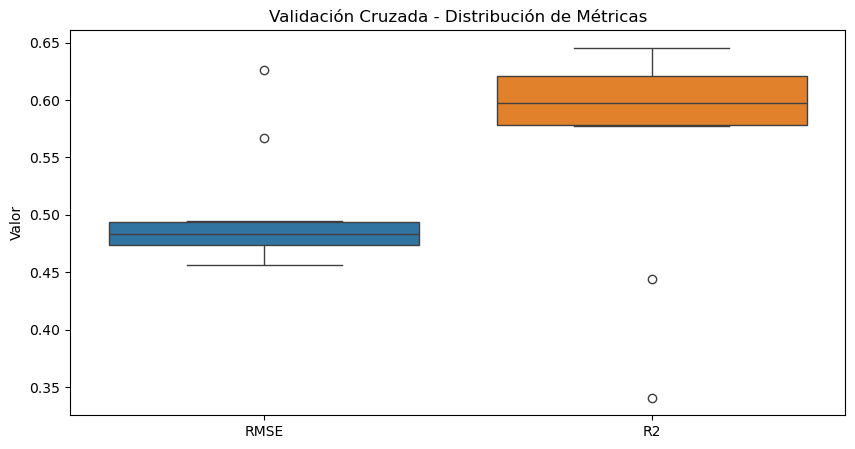

In [806]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer  


df_encoded = pd.get_dummies(df, drop_first=True)  


imputer = SimpleImputer(strategy='mean')  
df_imputed = pd.DataFrame(imputer.fit_transform(df_encoded), columns=df_encoded.columns)


X = df_imputed.drop(columns=['Salary'])
y = df_imputed['Salary']


kf = KFold(n_splits=10, shuffle=True, random_state=42)


rmse_scores = []
r2_scores = []


for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    
    model = LinearRegression()
    model.fit(X_train, y_train)

    
    y_pred = model.predict(X_test)

    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    
    rmse_scores.append(rmse)
    r2_scores.append(r2)


results_df = pd.DataFrame({'RMSE': rmse_scores, 'R2': r2_scores})


plt.figure(figsize=(10, 5))
sns.boxplot(data=results_df)
plt.title('Validación Cruzada - Distribución de Métricas')
plt.ylabel('Valor')
plt.show()





### Pregunta 8 ###
A la vista de los resultados de validación, ¿Existen problemas de varianza en los modelos entrenados?¿Por qué? 

***Respuesta:***

Las cajas son relativamente compactas lo que nos indica que los errores del modelo son relativamente estables en los diferentes grupos y por otro lado la dispersión también es baja lo que hace que sea consistente en el poder explicativo. 

Como siguiente paso, vamos a aplicar selección de variables a nuestro conjunto de datos para ver si somos capaces de encontrar un modelo que, a través de un conjunto menor de variables, sea capaz de predecir muy parecido o mejor incluso que el modelo de regresión lineal que acabamos de obtener en primera instancia.

Para ello vamos a proceder de dos formas. La primera consiste en llevar a cabo un metodo automatico de selección de variables hacía adelante (Forward). En los siguientes bloques de código, se ha de programar las instrucciones necesarias para llevar a cabo esta selección de variables. Se valorará mostrar el gráfico secuencial que muestra el perfomance de cada iteración. 

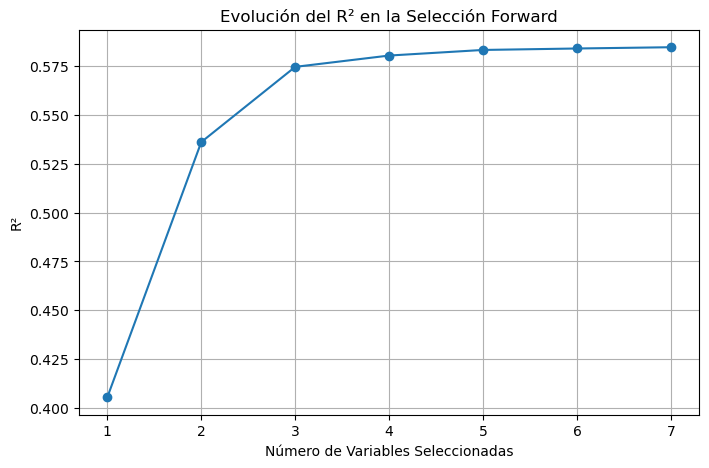

Variables seleccionadas: ['Education Level', 'Years of Experience', 'Age', 'Gender', 'Job Title', 'Senior', 'Missing_Count']


In [811]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

def forward_selection(X, y):
    """Selección de variables Forward basada en R²."""
    selected_features = []
    remaining_features = list(X.columns)
    best_r2 = 0
    r2_progress = []

    while remaining_features:
        best_feature = None
        temp_r2 = best_r2  

        for feature in remaining_features:
            model_features = selected_features + [feature]
            X_train_sm = sm.add_constant(X[model_features])  
            model = sm.OLS(y, X_train_sm).fit()
            
            if model.rsquared > temp_r2:  
                temp_r2 = model.rsquared
                best_feature = feature

        if best_feature is not None:
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)
            best_r2 = temp_r2  
            r2_progress.append(best_r2)
        else:
            break  

    return selected_features, r2_progress

X = df.drop(columns=['Salary'])  
y = df['Salary']  

X = X.apply(pd.to_numeric, errors='coerce')

X = X.fillna(X.mean())

X = pd.get_dummies(X, drop_first=True)

X = X.replace([np.inf, -np.inf], np.nan)

mask = ~X.isna().any(axis=1)
X, y = X[mask], y[mask]

selected_features, r2_progress = forward_selection(X, y)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(r2_progress) + 1), r2_progress, marker='o', linestyle='-')
plt.xlabel('Número de Variables Seleccionadas')
plt.ylabel('R²')
plt.title('Evolución del R² en la Selección Forward')
plt.grid()
plt.show()

print("Variables seleccionadas:", selected_features)

### Pregunta 9 ###
¿Cuál es el número de variables seleccionadas por el método aplicado? ¿cuál es el valor de la métrica escogida para la selección de las variables, en la iteración correspondiente al número de variables seleccionadas?

***Respuesta:***

Lo correcto sería escoger 5 variables ya que al escoger la sexta la mejora no es significativa y solo añade complejidad al modelo, el valor para la cantidad escogida es de 58,3%.

Una vez realizada la selección de variables, se ha de entrenar un modelo de regresión lineal con dichas variables y mostrar el resumen del modelo entrenado. Una vez entrenado, aplicar validación cruzada para evaluar el modelo en todo el conjunto de datos para validar la generalización del modelo. De nuevo, la validación ha de ser en base a las 2 métricas escogidas en puntos anteriores, sobre conjuntos de test y han de mostrarse los resultados en diagramas de tipo de boxplot o que permitan entender cómo generaliza el modelo.

In [816]:
# Ajustar modelo regresión lineal para variables seleccionadas

import numpy as np
import pandas as pd
import statsmodels.api as sm

selected_features = ['Education Level', 'Years of Experience', 'Age', 'Gender', 'Job Title']

X = df[selected_features]
y = df['Salary']  

X = pd.get_dummies(X, drop_first=True)

X = X.apply(pd.to_numeric, errors='coerce')

X = X.fillna(X.mean())

X = X.replace([np.inf, -np.inf], np.nan)

mask = ~X.isna().any(axis=1)
X, y = X[mask], y[mask]

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     1869.
Date:                Sun, 23 Mar 2025   Prob (F-statistic):               0.00
Time:                        23:44:16   Log-Likelihood:                -4775.1
No. Observations:                6684   AIC:                             9562.
Df Residuals:                    6678   BIC:                             9603.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.5183    

In [817]:
# Mostrar principales atributos, coeficientes, etc. del modelo entrenado

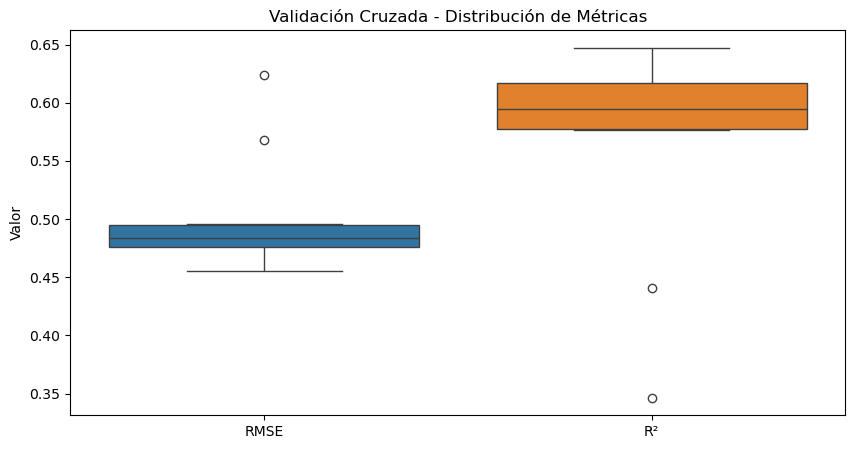

        RMSE     R²
count 10.000 10.000
mean   0.503  0.564
std    0.052  0.095
min    0.455  0.346
25%    0.476  0.577
50%    0.484  0.595
75%    0.495  0.617
max    0.624  0.647


In [818]:
# Aplicar validación cruzada
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

selected_features = ['Education Level', 'Years of Experience', 'Age', 'Gender', 'Job Title']

X = df[selected_features]
y = df['Salary']  

X = pd.get_dummies(X, drop_first=True)

imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

kf = KFold(n_splits=10, shuffle=True, random_state=42)

rmse_scores = []
r2_scores = []

for train_index, test_index in kf.split(X_imputed):
    X_train, X_test = X_imputed.iloc[train_index], X_imputed.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    rmse_scores.append(rmse)
    r2_scores.append(r2)

results_df = pd.DataFrame({'RMSE': rmse_scores, 'R²': r2_scores})

plt.figure(figsize=(10, 5))
sns.boxplot(data=results_df)
plt.title('Validación Cruzada - Distribución de Métricas')
plt.ylabel('Valor')
plt.show()

print(results_df.describe())


In [819]:
# Apoyo gráfico para interpretar la validación

### Pregunta 10 ###
En base a los resultados obtenidos, comparar con los resultados obtenidos para el modelo de regresión lineal y explicar las conclusiones sobre cuál de los 2 modelos parece aportar más beneficios para el objetivo del proyecto.

***Respuesta:***

El primer modelo se adapta mejor a la explicación de la variabilidad de Salary sin embargo, el segundo modelo tiene un poco menos de explicación de la variabilidad del objetivo pero reduce sus dimensiones lo que lo hace un modelo mucho más simple de aplicar.

Ahora se ha de entrenar un nuevo modelo de regresión lineal pero esta vez, en lugar de aplicar una selección de variables como se acaba de realizar, el alumno debe llevar a cabo un analisis de compoenentes principales que reduzca la dimensionalidad del conjunto original de datos. Y a partir de dichas componentes, entrenar y evaluar el modelo de regresión lineal.

En primer lugar, se han escribir los bloques de código que permiten realizar el analisis de componentes principales.

In [824]:
# Crear el analisis de PCA a partir del conjunto de variables predictoras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['Salary'])

X = pd.get_dummies(X, drop_first=True)

X.fillna(X.mean(), inplace=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

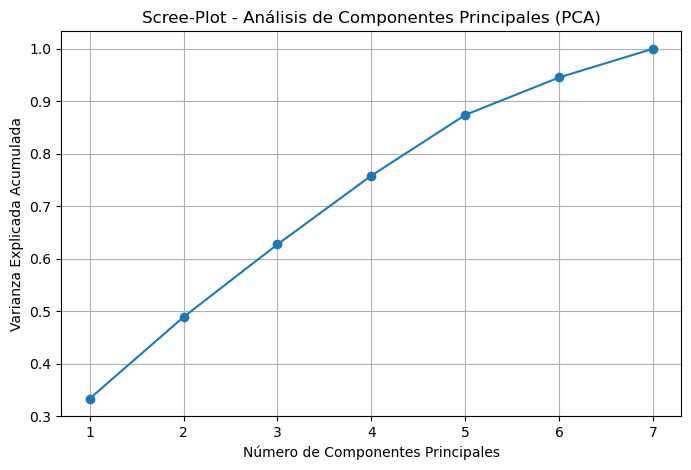

  Componente  Varianza Explicada  Varianza Acumulada
0        PC1               0.333               0.333
1        PC2               0.156               0.489
2        PC3               0.138               0.627
3        PC4               0.131               0.758
4        PC5               0.116               0.874
5        PC6               0.071               0.945
6        PC7               0.055               1.000


In [825]:
# Graficar la varianza explicada acumulada (scree-plot)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Scree-Plot - Análisis de Componentes Principales (PCA)')
plt.grid()
plt.show()

pca_df = pd.DataFrame({
    'Componente': [f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))],
    'Varianza Explicada': pca.explained_variance_ratio_,
    'Varianza Acumulada': explained_variance_ratio
})
print(pca_df)

### Pregunta 11 ###
Para un porcentaje de varianza explicada del 95%, ¿cuál es el número de componentes principales que consiguen explicar dicho porcentaje de varianza?

***Respuesta:***

Para lograra un 95% de la varianza explicada necesitariamos extrictamente los 7 componentes pero con 6 nos aproximamos al 94,53% lo cual queda muy cerca del objetivo de explicación de la varianza.

A continuación, con las nuevas componentes principales como variables predictoras y los datos proyectados sobre ellas, entrenar un modelo de regresión lineal y mostrar los resultados del entrenamiento. Una vez entrenado, aplicar validación cruzada para evaluar el modelo en todo el conjunto de datos validando así la generalización del modelo. De nuevo, la validación ha de ser en base a las 2 métricas escogidas en puntos anteriores, sobre conjuntos de test y han de mostrarse los resultados en diagramas de tipo de boxplot o que permitan entender cómo generaliza el modelo.

Componentes seleccionadas: 6 de 7 variables originales

📌 Coeficientes del modelo:
PC1: 0.3618
PC2: -0.0086
PC3: 0.0818
PC4: 0.0484
PC5: -0.1868
PC6: 0.0336

📌 Intercepto: -0.0191


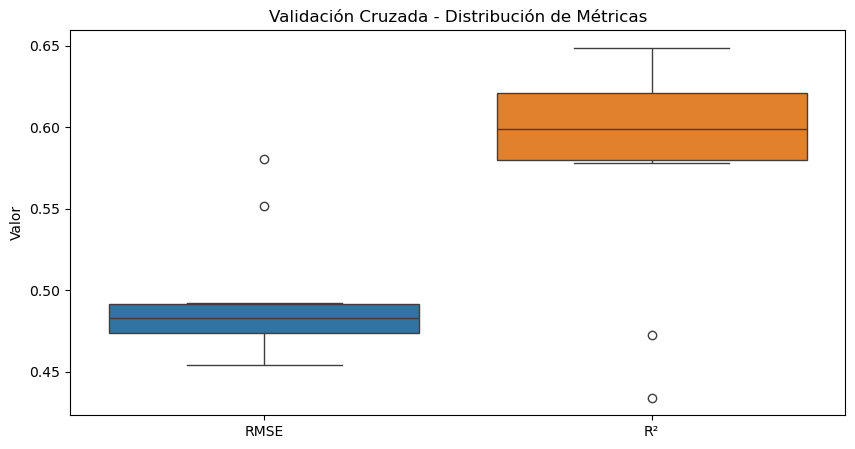

In [830]:
# Ajustar modelo regresión lineal para variables seleccionadas proyectadas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

X = df.drop(columns=['Salary'])
y = df['Salary']

X = pd.get_dummies(X, drop_first=True)

imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

pca = PCA(n_components=0.94)  
X_pca = pca.fit_transform(X_scaled)

print(f"Componentes seleccionadas: {X_pca.shape[1]} de {X.shape[1]} variables originales")

model = LinearRegression()
model.fit(X_pca, y)

print("\n📌 Coeficientes del modelo:")
for i, coef in enumerate(model.coef_):
    print(f"PC{i+1}: {coef:.4f}")

print(f"\n📌 Intercepto: {model.intercept_:.4f}")

kf = KFold(n_splits=10, shuffle=True, random_state=42)

rmse_scores = []
r2_scores = []

for train_index, test_index in kf.split(X_pca):
    X_train, X_test = X_pca[train_index], X_pca[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    rmse_scores.append(rmse)
    r2_scores.append(r2)

results_df = pd.DataFrame({'RMSE': rmse_scores, 'R²': r2_scores})

plt.figure(figsize=(10, 5))
sns.boxplot(data=results_df)
plt.title('Validación Cruzada - Distribución de Métricas')
plt.ylabel('Valor')
plt.show()


In [831]:
# Mostrar principales atributos, coeficientes, etc. del modelo entrenado

In [832]:
# Aplicar validación cruzada

In [833]:
# Apoyo gráfico para interpretar la validación

### Pregunta 12 ###
En vista de los resultados, comparar con los anteriores 2 modelos entrenados (el original de regresión lineal y aquel al que aplicamos selección de variables con método forward). ¿Qué modelo de entre los 3 tiene el atributo *Condition Number* más bajo y por qué? En general y a modo de conclusión, ¿Qué modelo de los 3 parece más apropiado para el caso de uso y por qué?

***Respuesta:***

Desde el punto de vista que entre los 3 modelos no hay una gran diferencia a la hora de la explicabilidad de la variabilidad de Salary escogeríamos el segundo modelo que es el más simple y el que menos dimensiones tiene pese a ser un poco inferior su explicación de la varibilidad de la variable objetivo.

Pasamos ahora a cambiar el objetivo del proyecto pero haciendo uso del mismo conjunto de datos. Todas las transformaciones y preparaciones comunes que hayamos establecido, seguirán siendo válidas y tan solo quedarán aquellas específicas para este nuevo caso de uso.

La nueva variable objetivo será ***Gender***. El modelo debe ser capaz de determinar para cada registro si se trata de hombre o mujer según esta variable de genero. Las variables predictoras serán todas las demás (incluyendo en esta ocasión la variable ***Salary*** como una predictora más. El modelo que vamos a tratar de modelar para clasificar nuestros datos será de regresión logística.

En primer lugar, se debe transformar la variable categórica ***Gender*** codificándola con 0 cuando el registro sea *Female* o 1 cuando es *Male*. Una vez realizada esta transformación, ya tenemos preparada nuestra variable objetivo. En este caso, mantenemos y asumimos como valores correctos la imputación de valores nulos que se llevó a cabo en anteriores ejercicios correspondientes a la fase de preparación de los datos.

In [838]:
# Binarizar la variable objetivo
df = pd.read_csv(r"C:\Users\Usuario\Desktop\Salary_MD.csv")  

df['Gender'] = df['Gender'].astype(str).str.strip().str.lower().map({'female': 0, 'male': 1})

moda_genero = df['Gender'].mode()[0]  

df['Gender'] = df['Gender'].fillna(moda_genero)

print(df['Gender'].unique())  

[1. 0.]


A continuación, podríamos tratar de modelar la regresión logística con el dataset actual, tomando como variable objetivo ***Gender*** que acabamos de transformar. Lo más normal es que al hacerlo, el modelo de un error al entrenarlo por no llegar a converger o directamente porque la matriz a invertir para calcular los coeficientes, sea singular y no pueda invertirse. Esto se debe a colinealidad entre las variables predictoras. Queda a criterio del alumno, hacer él mismo la prueba de tratar de entrenar la regresión y verificar si efectivamente da problemas y no se consigue un modelo válido.

Por evitar esta situación, vamos a realizar un paso previo que consistirá en un analisis factorial, mediante el cual daremos con unos factores que por un lado nos aportarán información potencial subyacente sobre las variables latentes que pueda contener nuestro conjunto de variables predictoras, y por otro lado nos ayudará a reducir la dimensionalidad del conjunto para evitar la multicolinealidad. Esto nos permitirá llevar a cabo el entrenamiento del modelo de regresión lineal.

Los siguientes bloques de código deben ajustar un analisis de componentes principales a partir de nuestro conjunto de variables predictoras recién definido. Después se debe mostrar en una tabla cada uno de los autovectores, su correspondiente autovalor, el porcentaje de varianza explicada y el porcentaje de varianza acumulada estando las componentes ordenadas de mayor a menor porcentaje de varianza explicada. Por último, se debe mostrar en un gráfico de tipo scree-plot (gráfico de codo), la varianza explicada en función del número de componentes principales.

In [840]:
categorical_cols = X.select_dtypes(include=['object']).columns

print("Variables categóricas detectadas:", categorical_cols.tolist())


Variables categóricas detectadas: []


In [841]:
# Usar PCA para obtener autovectores y autovalores
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['Gender'])  

X = pd.get_dummies(X, drop_first=True)

X = X.fillna(X.mean())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

eigenvalues = pca.explained_variance_
eigenvectors = pca.components_

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

pca_df = pd.DataFrame({
    'Componente': [f'PC{i+1}' for i in range(len(eigenvalues))],
    'Autovalor': eigenvalues,
    'Varianza Explicada (%)': explained_variance_ratio * 100,
    'Varianza Acumulada (%)': cumulative_variance * 100
})

print(pca_df)

    Componente  Autovalor  Varianza Explicada (%)  Varianza Acumulada (%)
0          PC1      3.344                   2.290                   2.290
1          PC2      2.145                   1.469                   3.759
2          PC3      1.952                   1.337                   5.095
3          PC4      1.802                   1.234                   6.329
4          PC5      1.642                   1.125                   7.454
..         ...        ...                     ...                     ...
141      PC142      0.239                   0.164                  99.729
142      PC143      0.187                   0.128                  99.858
143      PC144      0.133                   0.091                  99.949
144      PC145      0.069                   0.047                  99.996
145      PC146      0.006                   0.004                 100.000

[146 rows x 4 columns]


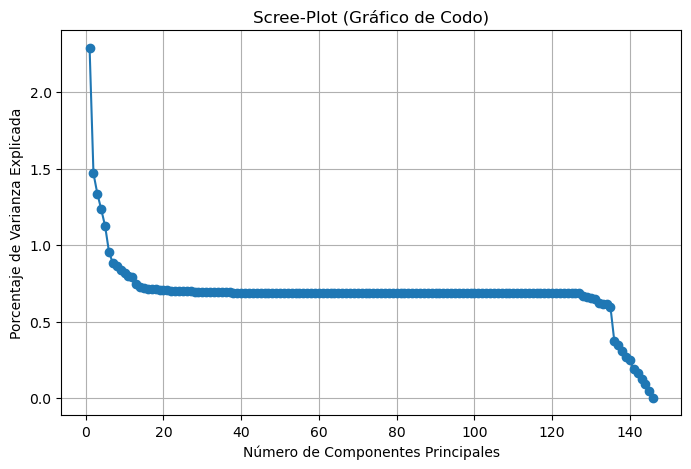

In [842]:
# Graficar Scree-Plot (gráfico de codo)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(eigenvalues) + 1), explained_variance_ratio * 100, marker='o', linestyle='-')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Porcentaje de Varianza Explicada')
plt.title('Scree-Plot (Gráfico de Codo)')
plt.grid()
plt.show() 



### Pregunta 13 ###
De acuerdo a los resultados de la tabla, ¿Qué número de componentes consiguen explicar el 95% de la varianza conjunta de nuestro dataset?
Por otor lado, viendo también la gráfica obtenida, ¿Cuántos factores debemos escoger según el criterio de Kaiser?

***Respuesta:***

Para alcanzar una explicación del 95% de la varianza conjunta necesitariamos 130 componentes que supondría un 95,37%. Según el criterio de kaiser debemos escoger los autovectores mayores a 1 que son 127. 

Muestra en una tabla las cargas factoriales para el listado de variables. Cada columna debe hacer referencia a cada factor seleccionado mediante el criterio de Kaiser.

In [847]:
# Ajuste de Analisis Factorial para numero de factores según Kaiser
import numpy as np
import pandas as pd
from category_encoders import BinaryEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

if 'X_encoded' not in locals():
    X_encoded = df.drop(columns=['Gender'])  
    categorical_cols = X_encoded.select_dtypes(include=['object']).columns

    encoder = BinaryEncoder(cols=categorical_cols)
    X_encoded = encoder.fit_transform(X_encoded)

    X_encoded = X_encoded.fillna(X_encoded.mean())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

eigenvalues = pca.explained_variance_    
eigenvectors = pca.components_           

mask = eigenvalues > 1
num_factores = int(np.sum(mask))  

selected_eigenvalues = eigenvalues[mask]        
selected_eigenvectors = eigenvectors[mask, :]     

factor_loadings = selected_eigenvectors.T * np.sqrt(selected_eigenvalues).reshape(1, -1)

n_variables = X_encoded.shape[1]


cargas_df = pd.DataFrame(
    factor_loadings,
    index=X_encoded.columns, 
    columns=[f'Factor {i+1}' for i in range(num_factores)]
)

pd.set_option('display.float_format', '{:.3f}'.format)
print(cargas_df)

                     Factor 1  Factor 2  Factor 3  Factor 4  Factor 5  \
Age                     0.779    -0.086    -0.158     0.003     0.066   
Education Level         0.760    -0.123    -0.179    -0.024    -0.021   
Job Title_0            -0.140    -0.038    -0.007     0.034     0.260   
Job Title_1             0.418     0.201     0.666    -0.014    -0.097   
Job Title_2             0.534     0.035     0.290    -0.059    -0.325   
Job Title_3             0.302     0.205     0.620    -0.105    -0.333   
Job Title_4             0.048     0.182     0.418    -0.143    -0.413   
Job Title_5             0.219     0.084     0.343     0.185     0.505   
Job Title_6             0.092     0.123     0.412     0.214     0.570   
Job Title_7            -0.069    -0.160    -0.475    -0.143    -0.475   
Years of Experience     0.752    -0.105    -0.201    -0.009     0.086   
Salary                  0.633    -0.141    -0.272     0.007     0.037   
Country_0               0.050     0.810    -0.264  

In [848]:
# Matriz de cargas factoriales

### Pregunta 14 ###
En base a los factores seleccionados mediante el método de Kaiser, haz una interpretación del significado de los factores.

***Respuesta:***

El primer factor está relacionado con características personales y laborales, así refleja su fuerte relación con algunas variables como Age, Education Level. Years of Experience y Salary. 
El segundo y el cuarto factor se relacionan con características geográficas del individuo como su país o su etnia. 
El tercer y quinto factor tienen relación con el tipo de puesto de trabajo que ocupa. 
El sexto factor es del mismo tipo del segundo y el cuarto pero recoge el resto de variabilidad que los dos anteriores no detectan.
El séptimo valor es del mismo tipo que el tercero y el quinto recogiendo la variabilidad que las dos anteriores no detectan.


Para continuar con el analisis, vamos a seleccionar los 2 primeros factores. En el siguiente bloque de código se ha de presentar una tabla con las cargas factoriales de cada variable para los 2 factores seleccionados. Aplicar una rotación si se considera oportuno para ayudar a la interpretación de los factores. Después, se ha de mostrar en otra tabla las comunalidades y unicidades (ambas en expresadas como porcentaje). Por último, se ha de mostrar un diagrama biplot que represente, en función de los 2 factores escogidos, las variables que mayor representación según las cargas factoriales. Es decir, aquellas variables que tengan al menos una carga factorial mayor que 0.3. Esto reducirá el número de vectores a representar y hará que la visualización sea más legible.

In [853]:
!pip install factor-analyzer



 Tabla de cargas factoriales (con rotación Varimax):
                     Factor 1  Factor 2
Age                     0.755     0.000
Education Level         0.725    -0.027
Job Title_0            -0.099    -0.023
Job Title_1             0.276     0.052
Job Title_2             0.402     0.005
Job Title_3             0.187     0.054
Job Title_4             0.004     0.057
Job Title_5             0.138     0.016
Job Title_6             0.046     0.025
Job Title_7            -0.024    -0.038
Years of Experience     0.721    -0.010
Salary                  0.569    -0.027
Country_0               0.006     0.849
Country_1              -0.027    -0.752
Country_2               0.010    -0.105
Race_0                 -0.019    -0.383
Race_1                  0.007     0.582
Race_2                 -0.029    -0.190
Race_3                  0.006     0.030
Senior                  0.294    -0.025

 Tabla de comunalidades y unicidades:
                     Comunalidad (%)  Unicidad (%)
Age             

C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


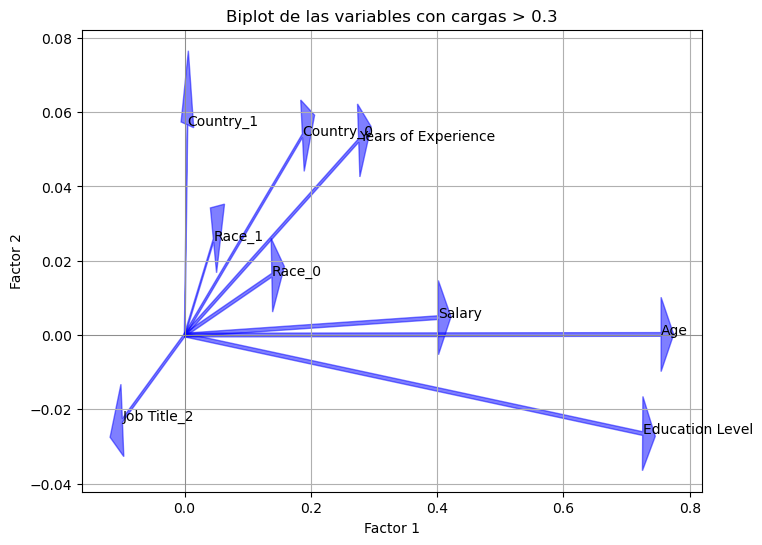

In [854]:
# Tabla de cargas factoriales para los 2 factores (incluyendo rotación si se elige)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.decomposition import PCA
from factor_analyzer import FactorAnalyzer

X_scaled = X_encoded.apply(zscore)

pca = PCA()
pca.fit(X_scaled)
eigenvalues = pca.explained_variance_

num_factores = 2
factor_analyzer = FactorAnalyzer(n_factors=num_factores, rotation='varimax')
factor_analyzer.fit(X_scaled)

cargas_rotadas = factor_analyzer.loadings_

cargas_df = pd.DataFrame(
    cargas_rotadas,
    index=X_encoded.columns,
    columns=[f'Factor {i+1}' for i in range(num_factores)]
)

print("\n Tabla de cargas factoriales (con rotación Varimax):")
print(cargas_df.round(3))

comunalidades = np.sum(cargas_rotadas**2, axis=1)
unicidades = 1 - comunalidades

comunalidades_df = pd.DataFrame({
    'Comunalidad (%)': comunalidades * 100,
    'Unicidad (%)': unicidades * 100
}, index=X_encoded.columns)

print("\n Tabla de comunalidades y unicidades:")
print(comunalidades_df.round(2))

umbral = 0.3
variables_biplot = cargas_df[(cargas_df.abs() > umbral).any(axis=1)]

fig, ax = plt.subplots(figsize=(8, 6))

for i, variable in enumerate(variables_biplot.index):
    plt.arrow(0, 0, cargas_rotadas[i, 0], cargas_rotadas[i, 1],
              color='b', alpha=0.5, head_width=0.02, head_length=0.02)
    plt.text(cargas_rotadas[i, 0], cargas_rotadas[i, 1], variable, fontsize=10)

plt.axhline(0, color='grey', linewidth=0.5)
plt.axvline(0, color='grey', linewidth=0.5)
plt.xlabel("Factor 1")
plt.ylabel("Factor 2")
plt.title("Biplot de las variables con cargas > 0.3")
plt.grid(True)
plt.show()



In [855]:
# Tabla de comunalidades y unicidades

In [856]:
# Filtrado de variables para representación biplot

In [857]:
# Representación gráfica biplot de vectores de variables

### Pregunta 15 ###
Según los resultados mostrados, ¿Qué interpretación podemos hacer de los porcentajes de comunalidades y unicidades? En caso de obtener unicidades por debajo de 0, ¿A qué se debe?. Analizando el diagrama biplot, ¿Qué podemos concluir acerca de las variables representadas?

***Respuesta:***

Las variables con una alta comunalidad indican que explican bien su variabilidad (Age, Education Level, Years of Experience) a su vez hay variables que con baja comunalidad por lo que no están bien representadas por los factores seleccionados (Job Title_0, Job Title_7, Race_3, Country_2). De la misma manera, en aquellas variables con las unicidades altas indica que los factores no contienen información relevante de esas variables. Dentro del diagrama de Biplot, se muestran variables con altas cargas factoriales como Age, Education Level, Salary o Years of Experience que muestran su buena representación con los factores seleccionados. Sin embargo, otras variables como Race no están bien representadas y por eso no tiene una alta carga factorial. 

Seguimos con el diseño de nuestro modelo para intentar distinguir entre *Male* y *Female* para cada uno de los registros del conjunto de datos. Para ello vamos a tratar de modelar la regresión logística.

Vamos a tratar de reducir la dimensionalidad de nuestro conjunto de variables predictoras aplicando un método de regularización. De esta forma trataremos de diseñar un modelo de regresión logística con regularización que evite en la medida de lo posible la multicolinealidad y manteniendo la máxima información posible acerca de nuestra variable objetivo. 

En los siguientes bloques de código, se ha de terminar de transformar el conjunto de datos para que pueda ser utilizado en un modelo de regresión logística. Ya se realizó la binarización de la variable objetivo ***Gender*** pero ahora queda normalizar, estandarizar y demás operaciones que considere el alumno oportunas para este modelo.

In [862]:
# Normalización y estandarización

In [863]:
# Codificación de categóricas

In [864]:
# etc

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

df = pd.read_csv(r"C:\Users\Usuario\Desktop\Salary_MD.csv")

X = df.drop(columns=['Gender'])  
y = df['Gender'].map({'Male': 1, 'Female': 0})  

X = X[y.notnull()]
y = y.dropna()

num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object', 'category']).columns

num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(penalty='l2', solver='liblinear'))  
])


model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print(f"Accuracy en entrenamiento: {train_score:.4f}")
print(f"Accuracy en prueba: {test_score:.4f}")

Accuracy en entrenamiento: 0.6681
Accuracy en prueba: 0.6697


Una vez preparados los datos, pasamos a modelar la regresión logísitica aplicando una regularización LASSO. Queda a discreción del alumno la configuración del algoritmo de optimización de la función de coste y la fuerza de la regularización. Se deberán mostrar como resultado del entrenamiento los coeficientes de la regresión con la desviación estandar de los errores en su estimación, el logaritmo de la verosimilitud, el de logaritmo de la verosimilitud del modelo nulo, el pseudo-R2 y las métricas AIC y BIC.

In [866]:
# Modelado con regularización LASSO
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, log_loss


df = pd.read_csv(r"C:/Users/Usuario/Desktop/Salary_MD.csv")

df = df.dropna(subset=['Gender'])

df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

X = df.drop(columns=['Gender', 'Years of Experience'])
y = df['Gender']

cat_features = X.select_dtypes(include=['object']).columns.tolist()
num_features = X.select_dtypes(exclude=['object']).columns.tolist()

num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  
    ('scaler', StandardScaler())                     
])

cat_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

X_transformed = preprocessor.fit_transform(X)

if hasattr(X_transformed, "toarray"):
    X_transformed = X_transformed.toarray()

X_train, X_test, y_train, y_test = train_test_split(
    X_transformed, y, test_size=0.2, random_state=42, stratify=y
)

param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(
    LogisticRegression(penalty='l1', solver='liblinear', max_iter=5000),
    param_grid,
    cv=5,
    scoring='accuracy'
)
grid_search.fit(X_train, y_train)
best_C = grid_search.best_params_['C']

lasso_model = LogisticRegression(penalty='l1', solver='liblinear', C=best_C, max_iter=5000)
lasso_model.fit(X_train, y_train)

print("\n🔹 Clasificación en datos de prueba:")
print(classification_report(y_test, lasso_model.predict(X_test)))

encoded_features = preprocessor.named_transformers_['cat'].named_steps['encoder'].get_feature_names_out(cat_features)
all_features = num_features + list(encoded_features)

coef_df = pd.DataFrame({'Variable': all_features, 'Coeficiente': lasso_model.coef_[0]})
print("\nCoeficientes del modelo LASSO:")
print(coef_df)

log_likelihood = -log_loss(y_test, lasso_model.predict_proba(X_test)[:, 1])
null_log_likelihood = -log_loss(y_test, np.full_like(y_test, y_test.mean()))
pseudo_r2 = 1 - (log_likelihood / null_log_likelihood)

n = X_train.shape[0]
k = X_train.shape[1]
aic = 2 * k - 2 * log_likelihood
bic = k * np.log(n) - 2 * log_likelihood

print(f"\n🔹 Log-verosimilitud: {log_likelihood:.4f}")
print(f"🔹 Log-verosimilitud modelo nulo: {null_log_likelihood:.4f}")
print(f"🔹 Pseudo-R²: {pseudo_r2:.4f}")
print(f"🔹 AIC: {aic:.4f}")
print(f"🔹 BIC: {bic:.4f}")



🔹 Clasificación en datos de prueba:
              precision    recall  f1-score   support

           0       0.75      0.41      0.53       593
           1       0.65      0.89      0.75       730

    accuracy                           0.68      1323
   macro avg       0.70      0.65      0.64      1323
weighted avg       0.70      0.68      0.65      1323


Coeficientes del modelo LASSO:
                      Variable  Coeficiente
0                          Age        0.180
1              Education Level       -0.149
2                       Salary        0.173
3                       Senior        0.038
4    Job Title_Account Manager        0.000
..                         ...          ...
140              Race_Hispanic        0.000
141                Race_Korean        0.000
142                 Race_Mixed        0.000
143                 Race_Welsh        0.000
144                 Race_White        0.000

[145 rows x 2 columns]

🔹 Log-verosimilitud: -0.6146
🔹 Log-verosimilitud mo

### Pregunta 16 ###
En vista de las métricas y resultados obtenidos, ¿qué tal ha predicho los valores del conjunto de entrenamiento? A partir de los coeficientes estimados, ¿Qué interpretación hacemos de los odds de la categoría *Mixed* de la variable ***Race*** y las categorías *Receptionist* y *Front End Developer* de la variable ***Job Title***? ¿Qué interpretamos del valor obtenido de la métrica Pseudo-R2?

***Respuesta:***

El modelo tiene una precisión del 68% que por un lado identifica bien a los hombres en un 89% pero solo un 41% para identificar mujeres. La variable Race_Mixed no afecta a la hora de decidir si el registro es hombre o mujer ya que su coeficiente es 0. El valor de la métrica de Pseudo-R cuadrado, nos indica que el modelo explica bien la variabilidad de la variable Gender. 

Para el conjunto de validación, utilizar el modelo entrenado para validarlo a través de métricas de validación como la precisión, exactitud, sensibilidad, etc., obtenidas a partir de la matriz de confusión. Mostrar la gráfica de la curva ROC y calcular el area bajo la curva.

In [871]:
# Clasificar los registros del conjunto de validación aplicando el modelo entrenado

In [872]:
# Calcular la matriz de confusión y sus métricas

In [873]:
# Mostrar la curva ROC y calcular el area bajo la curva.

🔹 Matriz de Confusión:
[[246 347]
 [ 81 649]]

🔹 Métricas de validación:
Exactitud (Accuracy): 0.6765
Precisión (Precision): 0.6516
Sensibilidad (Recall): 0.8890
Especificidad (Specificity): 0.4148
F1-score: 0.7520


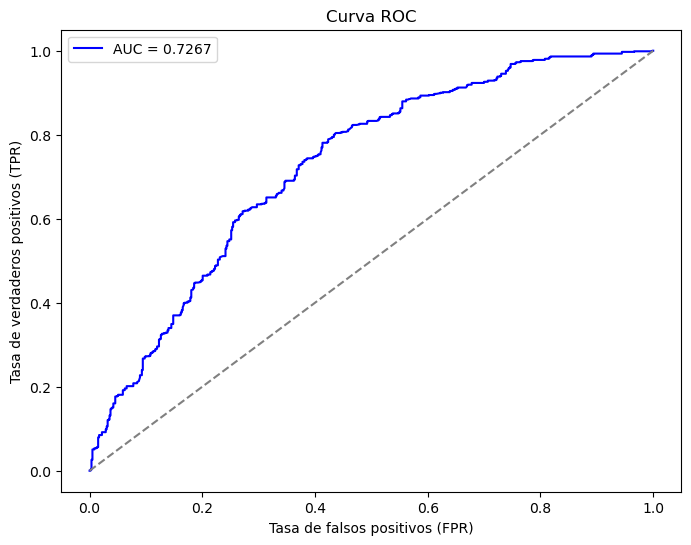


🔹 Área bajo la curva (AUC-ROC): 0.7267


In [874]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
)

y_val_pred = lasso_model.predict(X_test)
y_val_proba = lasso_model.predict_proba(X_test)[:, 1]  

cm = confusion_matrix(y_test, y_val_pred)
tn, fp, fn, tp = cm.ravel()

accuracy = accuracy_score(y_test, y_val_pred)
precision = precision_score(y_test, y_val_pred)
recall = recall_score(y_test, y_val_pred)
specificity = tn / (tn + fp)  
f1 = f1_score(y_test, y_val_pred)

print("🔹 Matriz de Confusión:")
print(cm)
print("\n🔹 Métricas de validación:")
print(f"Exactitud (Accuracy): {accuracy:.4f}")
print(f"Precisión (Precision): {precision:.4f}")
print(f"Sensibilidad (Recall): {recall:.4f}")
print(f"Especificidad (Specificity): {specificity:.4f}")
print(f"F1-score: {f1:.4f}")

fpr, tpr, _ = roc_curve(y_test, y_val_proba)
auc_roc = roc_auc_score(y_test, y_val_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", label=f"AUC = {auc_roc:.4f}")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Línea base
plt.xlabel("Tasa de falsos positivos (FPR)")
plt.ylabel("Tasa de verdaderos positivos (TPR)")
plt.title("Curva ROC")
plt.legend()
plt.show()

print(f"\n🔹 Área bajo la curva (AUC-ROC): {auc_roc:.4f}")


### Pregunta 17 ###
Realizar una interpretación de los resultados obtenidos en las métricas: accuracy y recall (para ambas categorías 0 y 1). ¿Cuál es el valor del area bajo la curva obtenido? ¿Qué conclusión sobre el modelo obtenemos a partir de este valor? ¿Y cual sería la conclusión general del modelo en base a todos los resultados obtenidos?

***Respuesta:***

Representa que el modelo tiene un 67,65% de predicciones correctas además por el recall podemos ver que un 88,90% de los hombres fueron correctamente identificados. El valor de la curva ROC es de 0.7267 lo que es una capacidad del modelo más o menos moderada de distinguir entre hombres y mujeres. 

En general, el modelo tiene una capacidad predictiva moderada pero identifica muy bien a los hombres mientras que tiene mucho margen de mejora en el caso de mujeres, esto puede ser debido a que el dataset tiene datos desbalanceados. 

Cambiamos de tercio y pasamos ahora a trabajar con todo el conjunto de datos completo (incluyendo la variable ***Gender***) ya que vamos a realizar un clustering sobre todo el conjunto para ver qué grupos o segmentos encontramos más representativos en los datos. Empezaremos cargando un fichero nuevo que contiene los mismos datos pero sin la necesidad de tratar o trabajar nulos y outliers. El fichero se llama *Salary.csv*.

El clustering que vamos a realizar sobre estos datos es un clustering jerarquico aglomerativo. Para ello prepararemos los datos categorizando algunas variables según se considere oportuno, agruparemos categorías de variables categóricas si procede, normalizaremos y/o estandarizaremos, codificaremos variables categóricas, etc. Muchos de estos pasos son comunes con los ejercicios anteriores por lo que será sencillo repetir algunos de estos pasos. Otros podrán añadirse en función de lo que el alumno considere teniendo en cuenta el ejercicio de clusterización que vamos a llevar a cabo.

Las siguientes lineas de código deben llevar a cabo estas transformaciones.

Por sencillez a la hora de interpretar resultados, se recomienda trabajar sobre una copia del conjunto de datos original para poder extraer métricas a partir de los datos sin transformar.

In [879]:
# Categorización de variables numericas

In [880]:
# Codificación de categóricas

In [881]:
# Normalización / Estandarización

In [882]:
# etc

In [883]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


df = pd.read_csv("C:/Users/Usuario/Desktop/Salary_MD.csv")

df_original = df.copy()

df['Salary_Category'] = pd.qcut(df['Salary'], q=4, labels=['Bajo', 'Medio-Bajo', 'Medio-Alto', 'Alto'])
df['Age_Group'] = pd.cut(df['Age'], bins=[18, 30, 40, 50, 65], labels=['Joven', 'Adulto Joven', 'Adulto', 'Mayor'])

job_counts = df['Job Title'].value_counts()
rare_jobs = job_counts[job_counts < 10].index  
df['Job Title'] = df['Job Title'].replace(rare_jobs, 'Other')

df = df.drop(columns=['Salary_Category', 'Age_Group'])

cat_features = df.select_dtypes(include=['object']).columns.to_list()
num_features = df.select_dtypes(exclude=['object']).columns.to_list()

num_transformer = Pipeline([
    ('scaler', StandardScaler())  
])
cat_transformer = Pipeline([
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))  
])
preprocessor = ColumnTransformer([
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])
X_transformed = preprocessor.fit_transform(df)
if hasattr(X_transformed, "toarray"):
    X_transformed = X_transformed.toarray()

print("Datos preparados correctamente para clustering.")



Datos preparados correctamente para clustering.


A continuación procedemos a definir la función de enlace para el algoritmo jerarquico aglomerativo. Se requiere porbar al menos 2 funciones de enlace y hacer todo el proceso de clusterización completo para dichas funciones. Crear las matrices de distancias basadas en dichas funciones y mostrar los dendogramas de la clusterización, a ser posible indicando con colores selección de clusters.

In [885]:
# Crear las matrices de distancias para lsa funciones de enlace escogidas

In [886]:
# Mostrar los dendogramas

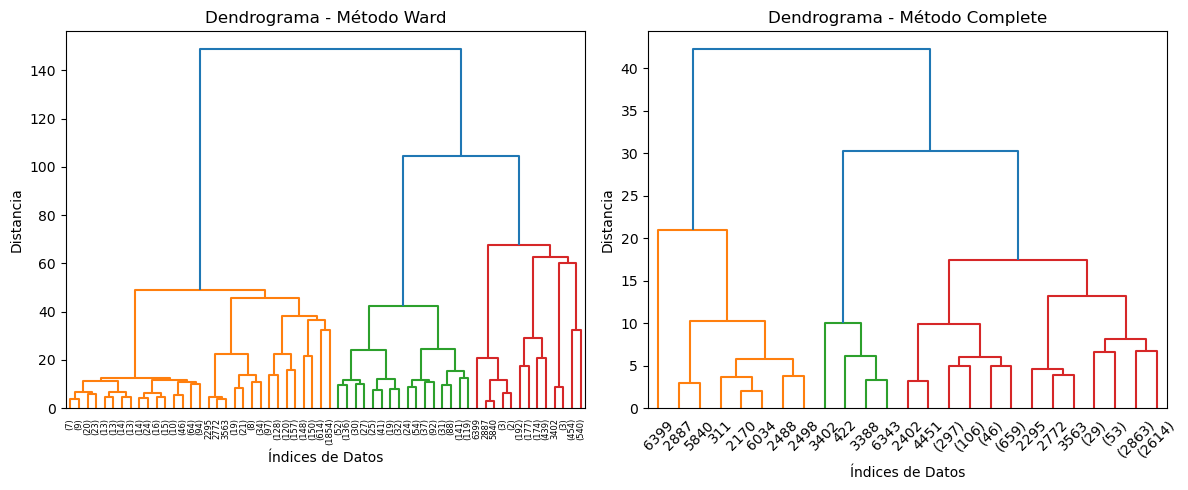

In [887]:
import numpy as np
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from sklearn.preprocessing import StandardScaler

X_transformed = np.nan_to_num(X_transformed)

distance_matrix = pdist(X_transformed, metric='euclidean')

linkage_methods = ["ward", "complete"]

plt.figure(figsize=(12, 5))

for i, method in enumerate(linkage_methods):
    Z = sch.linkage(distance_matrix, method=method) 

    plt.subplot(1, 2, i + 1)
    plt.title(f"Dendrograma - Método {method.capitalize()}")
    sch.dendrogram(Z, truncate_mode="level", p=5, color_threshold=0.7 * max(Z[:, 2])) 
    plt.xlabel("Índices de Datos")
    plt.ylabel("Distancia")

plt.tight_layout()
plt.show()


### Pregunta 18 ###
A la vista de los resultados, para cada función de enlace escogida, ¿En cuántos clusters se ha decidido agrupar los datos?

***Respuesta:***

Se ha decidido agrupar en 3 clusters distintos.

A continuación crear varias columnas nuevas sobre el dataframe original (una por cada función de enlace con que se haya decidido trabajar) y almacenar en ellas para cada registro el número de cluster que le corresponde según la clusterización realizada. Después realizar una serie de agrupaciones y métricas que permitan entender o interpretar la naturaleza de cada cluster.

In [892]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist
from sklearn.preprocessing import StandardScaler


df = pd.read_csv("C:/Users/Usuario/Desktop/Salary_MD.csv")

df.dropna(inplace=True)  

numeric_cols = df.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numeric_cols])


distance_matrix = pdist(df_scaled, metric="euclidean")


if np.any(~np.isfinite(distance_matrix)):
    raise ValueError("La matriz de distancias contiene valores no finitos.")

num_clusters = 3  

df["Cluster_Ward"] = sch.fcluster(sch.linkage(distance_matrix, method="ward"), num_clusters, criterion="maxclust")
df["Cluster_Complete"] = sch.fcluster(sch.linkage(distance_matrix, method="complete"), num_clusters, criterion="maxclust")

print("Distribución de clusters (Ward):")
print(df["Cluster_Ward"].value_counts())

print("\nMétricas de agrupación - Método Ward:")
print(df.groupby("Cluster_Ward")[numeric_cols].mean(numeric_only=True))

Distribución de clusters (Ward):
Cluster_Ward
3    3141
1    2396
2     924
Name: count, dtype: int64

Métricas de agrupación - Método Ward:
                Age  Education Level  Years of Experience     Salary  Senior
Cluster_Ward                                                                
1            26.795            0.855                3.035  69521.770   0.004
2            39.832            2.215               12.791 144245.753   1.000
3            36.293            2.043               10.803 144396.137   0.001


In [893]:
# Obtener métricas para interpretar los clustering obtenidos

### Pregunta 19 ###
Hacer una interpretación de los resultados para cada función de enlace indicando el sentido que pueda tener cada uno de los clusters.

***Respuesta:***

En primer lugar elegimos el método ward ya que es el que mejor representa los 3 clusters seleccionados, 

El primer cluster es referido a personas más jóvenes con menor nivel de educación, menor cantidad de años de experiencia y un salario menor.
El segundo cluster contiene a gente más experimentada con una media de edad superior y un salario más elevado además de ser característicos del apartado Senior en sus puestos de trabajo. 
El tercer cluster está muy relacionado con el segundo en cuanto a características solo que son perfiles con un poco menos edad que contienen algunos años menos de experiencia con un salario similar pero no contienen la característica de Senior en sus puestos laborales. 


